<a href="https://colab.research.google.com/github/tranhuuan170302/Tran-Huu-An-data-analyst/blob/main/%5BB%C3%A0i_t%E1%BA%ADp%5D_X%C3%A2y_d%E1%BB%B1ng_m%C3%B4_h%C3%ACnh_h%E1%BB%93i_quy_tuy%E1%BA%BFn_t%C3%ADnh_d%E1%BB%B1_b%C3%A1o_doanh_thu_theo_s%E1%BB%91_ti%E1%BB%81n_qu%E1%BA%A3ng_c%C3%A1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/10172251/advertising.csv")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [107]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Vẽ biểu đồ để trực quan hóa mối quan hệ giữa lượng sản phẩm được bán ra với lần lượt chi phí quảng  cáo trên TV, Radio và báo chí bằng hình ảnh, dùng 1 biểu đồ cho mỗi loại hình quảng cáo.

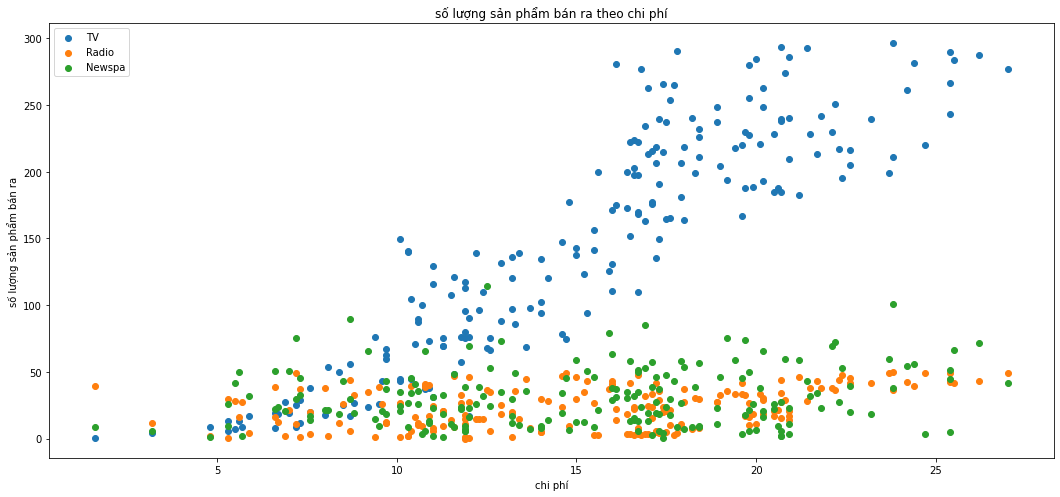

In [108]:
fig = plt.figure(figsize=(18,8))
plt.scatter(df['Sales'], df['TV'], label = "TV")
plt.scatter(df['Sales'], df['Radio'], label = "Radio")
plt.scatter(df['Sales'], df['Newspaper'], label = "Newspa")
plt.title("số lượng sản phẩm bán ra theo chi phí")
plt.xlabel("chi phí")
plt.ylabel("số lượng sản phẩm bán ra")
plt.legend()
plt.show()

## Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

In [109]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [110]:
X = df['Sales'].values.reshape(-1,1)
y = df['TV'].values.reshape(-1,1)

In [111]:
# chia bộ dữ liệu làm 2 tập train và test theo tỉ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  # Khai báo mô hình hồi quy tuyến tính
regressor.fit(X_train, y_train) #Huấn luyện mô hình

LinearRegression()

## Từ dữ liệu huấn luyện xây dựng mô hình hồi quy tuyến tính đơn biến với biến đầu vào là chi phí quảng cáo trên TV và lượng hàng bán ra. Dùng dữ liệu kiểm tra để đánh giá mô hình. 

In [112]:
print( "Mô hình hồi quy sẽ có dạng: số lượng sản phẩm bán ra = a + b * chi phí \nvới các hệ số a và b lần lượt là")
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

Mô hình hồi quy sẽ có dạng: số lượng sản phẩm bán ra = a + b * chi phí 
với các hệ số a và b lần lượt là
[-78.95424952]
[[14.94386419]]


In [113]:
y_pred = regressor.predict(X_test) # dự đoán trên số năm kinh nghiệm của bộ dữ liệu test
## tính toán R2 của model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, regressor.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))

df1 = pd.DataFrame({'sô lượng sản phẩm bán': X_test.flatten(), 'chi phí thực tế bỏ ra': y_test.flatten(), 'chi phí dự báo': y_pred.flatten()})
print("\n") # xuống dòng
print("Đánh giá năng lực dự báo trung bình trên tập test")
print('Sai số dự báo trung bình:', metrics.mean_absolute_error(y_test, y_pred))  

R2 trên tập huấn luyện của model là:0.8134588121404831
R2 trên tập kiểm tra của model là:0.7999225134051202


Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 28.89561568522071


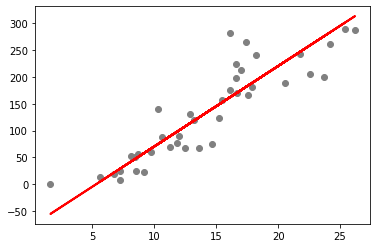

In [114]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [115]:
# lưu trữ mô hình vào máy tính
import pickle # thư viện  giúp lưu trữ mô hình
filename = 'model1.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [116]:
loaded_model = pickle.load(open(filename, 'rb'))
x = [[11.3],[21.5],[17.2]]
y_pred = loaded_model.predict(x)
y_pred

array([[ 89.9114158 ],
       [242.33883052],
       [178.08021451]])

In [117]:
df1

,sô lượng sản phẩm bán,chi phí thực tế bỏ ra,chi phí dự báo
0,11.3,69.2,89.911416
1,8.4,50.0,46.574210
2,12.0,90.4,100.372121
3,25.4,289.7,300.619901
4,16.7,170.2,170.608282
5,8.7,56.2,51.057369
6,7.2,8.7,28.641573
7,18.2,240.1,193.024079
8,9.2,23.8,58.529301
9,16.6,197.6,169.113896


## Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là lượng hàng bán ra, các biến đầu vào là chi phí cho cả 3 loại hình quảng cáo. Đánh giá mô hình.

In [118]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [119]:
y1 = df['Sales'].values
x1 = df.drop('Sales', axis = 1)

In [120]:
y1

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [121]:
x1 = x1.values

In [122]:
y = y.reshape(-1,1)
y.shape

(200, 1)

In [123]:
#Split the arrays into training and testing data sets
X1_train, X1_test,y1_train, y1_test= train_test_split(x1,y1,test_size=0.3,random_state=42)

In [124]:
#Create a regressor object
LR= LinearRegression()

#Fit training set to the regressor
LR.fit(X1_train,y1_train)

print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept =", LR.intercept_)
print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept = 4.743766701589685
Coefficients: [0.05358869 0.10270677 0.00793167]


In [125]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(normalize=False)

In [126]:
#Make predictions with the regressor
y1_prediction = LR.predict(X1_test)

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [128]:
y1_pred = LR.predict(X1_test) # dự đoán trên số năm kinh nghiệm của bộ dữ liệu test

In [129]:
# Calculate R2-score
import numpy as np
score=r2_score(y1_test,y1_pred)
print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y1_test, y1_prediction))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y1_test, y1_prediction)))

R2-score is  0.9091484341849799
Mean_sqrd_error is== 2.5416240362291496
Root_mean_squared error of is== 1.5942471691143596
